# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set()

In [2]:
data_2019 = pd.read_csv('flujo-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_completo = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset_completo.estacion=='Illia', dataset_completo.forma_pago == 'EFECTIVO')
ds_illia_efectivo = dataset_completo[mask]

#Quitamos las columnas que no vamos a utilizar
ds_illia_efectivo.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

ds_illia_efectivo.head()

/Users/armandosergiolopez/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [11]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
ds_illia_efectivo['Fecha2'] = pd.to_datetime(ds_illia_efectivo.fecha) + pd.to_timedelta(ds_illia_efectivo.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
ds_illia_efectivo.drop(columns=['fecha','hora_fin'], inplace = True)

ds_illia_efectivo.head()

<ipython-input-11-1510b2e79cef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_illia_efectivo['Fecha2'] = pd.to_datetime(ds_illia_efectivo.fecha) + pd.to_timedelta(ds_illia_efectivo.hora_fin, unit = 'h')
/Users/armandosergiolopez/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,dia,sentido,tipo_vehiculo,cantidad_pasos,Fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [12]:
#Corregimos el nombre de fecha2 a fecha
ds_illia_efectivo.rename(columns = {'Fecha2':'fecha'}, inplace = True) 
ds_illia_efectivo.head()

/Users/armandosergiolopez/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [13]:
#Reordenamos el dataset por fecha
ds_illia_efectivo.sort_values('fecha', inplace = True)
ds_illia_efectivo.reset_index(drop=True, inplace = True)
ds_illia_efectivo

<ipython-input-13-7194928765af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_illia_efectivo.sort_values('fecha', inplace = True)


,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


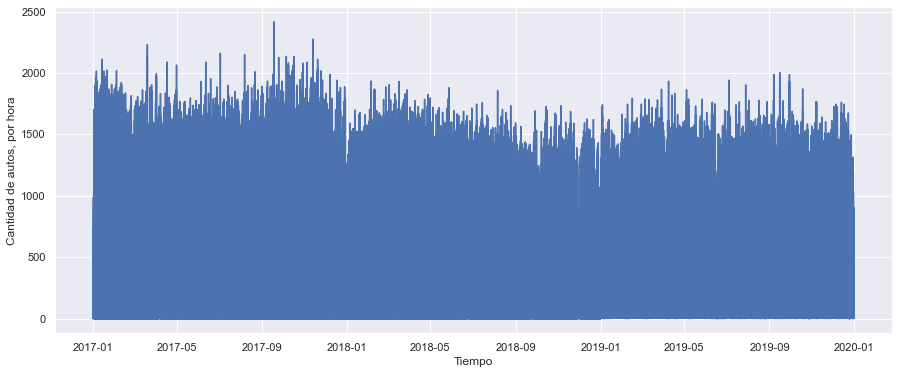

In [14]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(ds_illia_efectivo.fecha, ds_illia_efectivo.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [15]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = ds_illia_efectivo.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


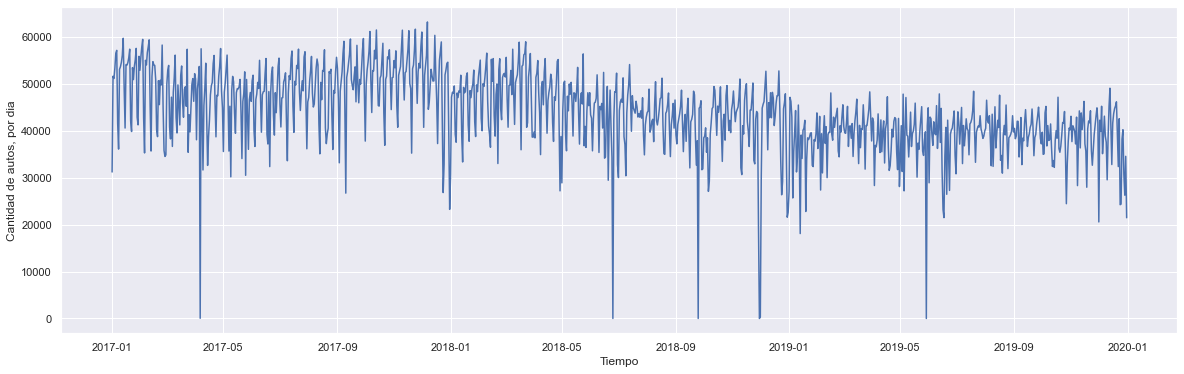

In [16]:
plt.figure(figsize = (20,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [17]:
#Resampleamos nuestros datos para agrupar por semana
week = ds_illia_efectivo.resample('W', on = 'fecha').sum()
print(week.shape)
week.head()

(158, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581


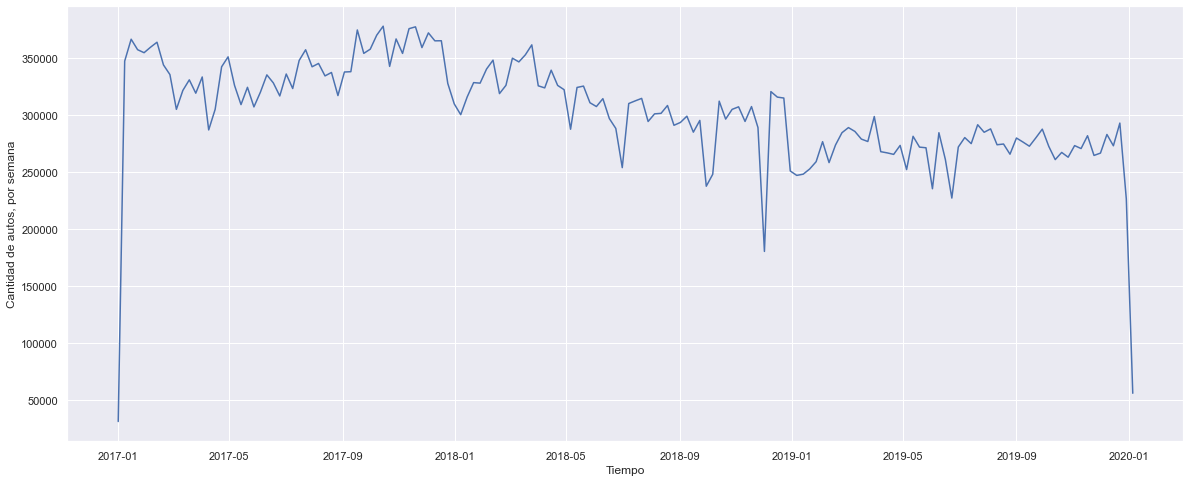

In [18]:
plt.figure(figsize = (20,8))
plt.plot(week.index, week.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.show()

In [19]:
#Resampleamos nuestros datos para agrupar por mes
month = ds_illia_efectivo.resample('M', on = 'fecha').sum()
print(month.shape)
month.head()

(36, 1)


,cantidad_pasos
fecha,
2017-01-31,1565260
2017-02-28,1363113
2017-03-31,1451214
2017-04-30,1373985
2017-05-31,1407136


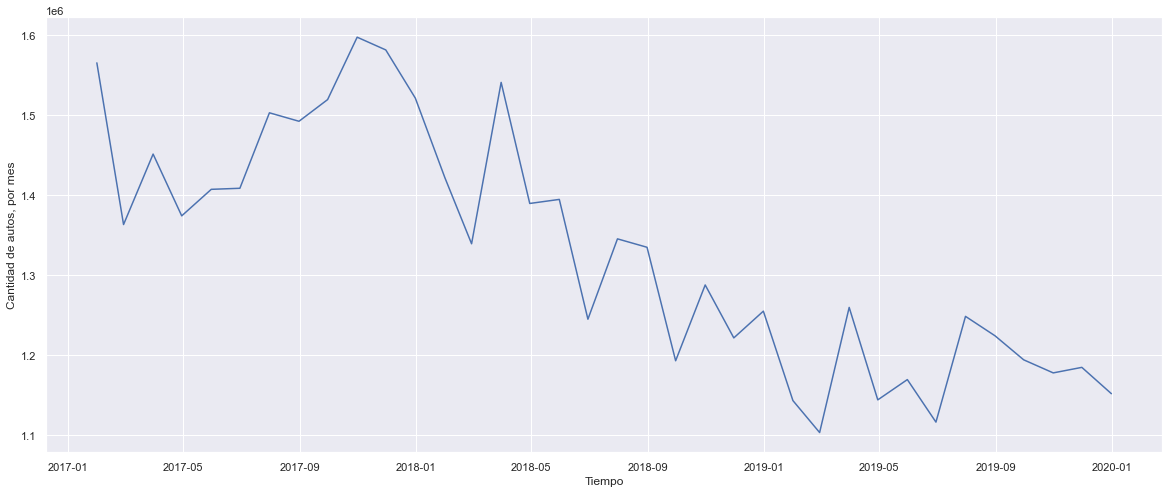

In [20]:
plt.figure(figsize = (20,8))
plt.plot(month.index, month.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.show()

Con este nuevo resampleo por mes, podemos observar claramente una tendencia negativa a partir de noviembre de 2017

In [25]:
ds_illia_efectivo.groupby(['dia']).mean()

,cantidad_pasos
dia,
Domingo,181.429677
Jueves,209.147305
Lunes,195.975486
Martes,199.957798
Miércoles,203.557378
Sábado,193.149081
Viernes,217.276736


In [26]:
ds_illia_efectivo.groupby(['sentido', 'dia']).mean()

cantidad_pasos
sentido   dia                      
Centro    Domingo        177.295910
          Jueves         200.130886
          Lunes          188.565924
          Martes         192.934342
          Miércoles      195.626284
          Sábado         186.336499
          Viernes        211.214388
Provincia Domingo        186.020959
          Jueves         219.632759
          Lunes          204.581123
          Martes         208.051592
          Miércoles      212.849929
          Sábado         200.842431
          Viernes        224.244641

In [27]:
ds_illia_efectivo.groupby(['tipo_vehiculo']).mean()

,cantidad_pasos
tipo_vehiculo,
Liviano,530.504751
Pesado,10.078154


    De los siguientes codigos, podemos observar y afirmar que el 98% de los autos que pasan son LIVIANOS, y solo el 2% es vehiculo pesado. 
    Ademas, en promedio siempre el flujo es mayor hacia provincia(cualquiera sea el dia)
    Por ultimo, se observa que el dia con mayor flujo es el Viernes
   

### Ahora analicemos como son las distintas tendencias, para resampleo mensual

In [28]:
ventana = int(365*2/53)

In [29]:
month_average_trend = month.rolling(window=ventana, center = True).mean()

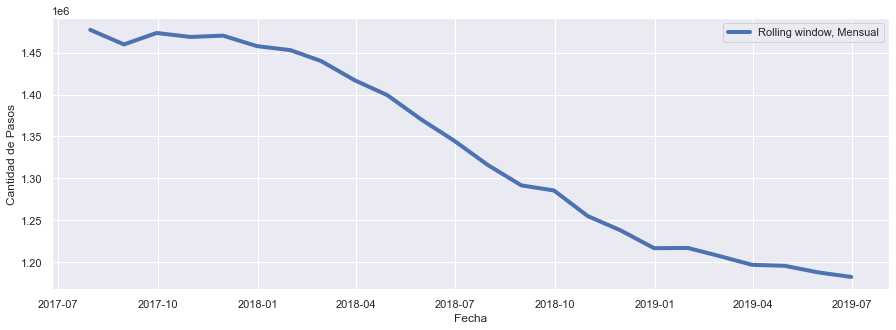

In [30]:
plt.figure(figsize = (15,5))
plt.plot(month_average_trend, lw=4, label = 'Rolling window, Mensual')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')
plt.legend()
plt.show()

Se observa mas claramente la tendencia negativa que mencionamos anteriormente cuando hicimos un resampleo por mes.
Ahora, haremos lo mismo pero separando por tipo de vehiculos

In [31]:
livianos = ds_illia_efectivo[ds_illia_efectivo.tipo_vehiculo=='Liviano']
pesados = ds_illia_efectivo[ds_illia_efectivo.tipo_vehiculo=='Pesado']

In [32]:
week_liviano = livianos.resample('W', on = 'fecha').sum()
week_pesado = pesados.resample('W', on = 'fecha').sum()

In [33]:
week_average_trend_liviano = week_liviano.rolling(window=ventana, center = True).mean()
week_average_trend_pesado = week_pesado.rolling(window=ventana, center = True).mean()

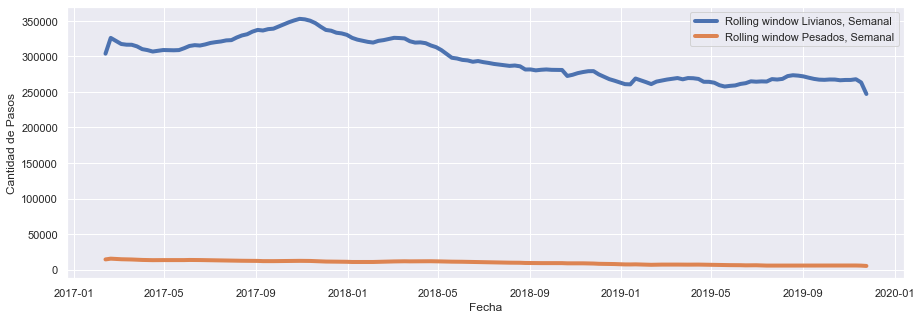

In [34]:
plt.figure(figsize = (15,5))
plt.plot(week_average_trend_liviano, lw=4, label = 'Rolling window Livianos, Semanal')
plt.plot(week_average_trend_pesado, lw=4, label = 'Rolling window Pesados, Semanal')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')
plt.legend()
plt.show()

Al hacer analisis de tendencia con el promedio movil, a traves de la funcion rolling, podemos ver lo siguiente:
1)La tendencia de vehiculos livianos es negativa a partir de Octubre/Noviembre de 2017.
2)La tendencia de vehiculos pesados siempre ha sido negativa, y casi que esta tendiendo a cero

#### Procedemos a hacer la descomposion de la serie en sus tres componentes: Tendencia, Estacionalidad y Ruido

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

descompose_week_liviano = seasonal_decompose(week_liviano, model='additive')
descompose_week_pesado = seasonal_decompose(week_pesado, model='additive')

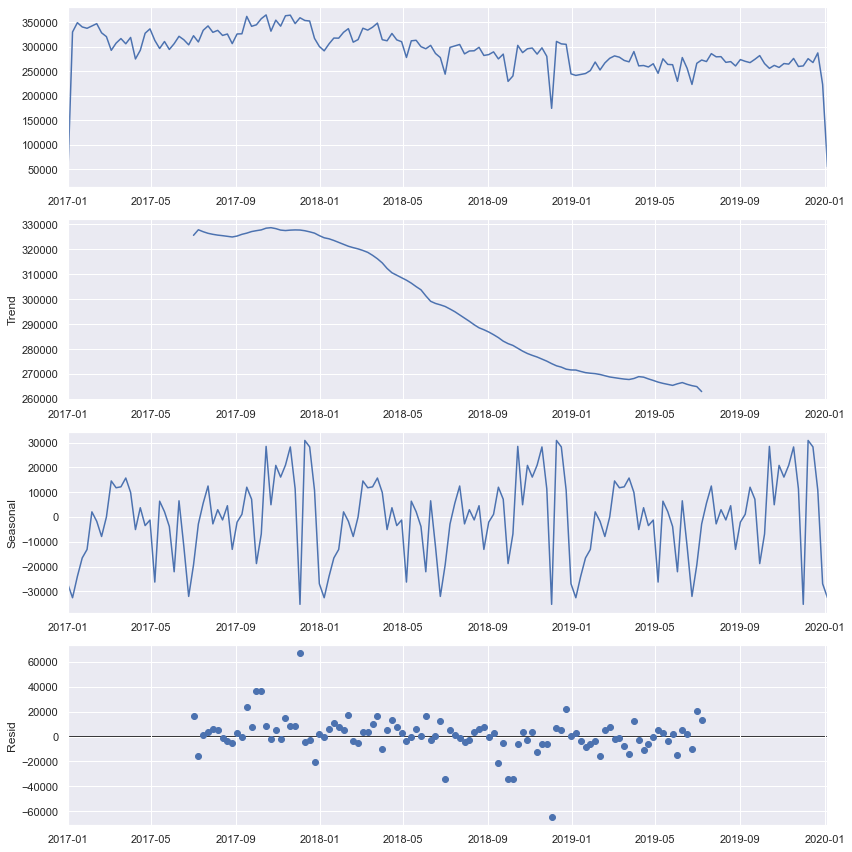

In [36]:
matplotlib.rcParams['figure.figsize'] = [12,12]
descompose_week_liviano.plot()
plt.show()

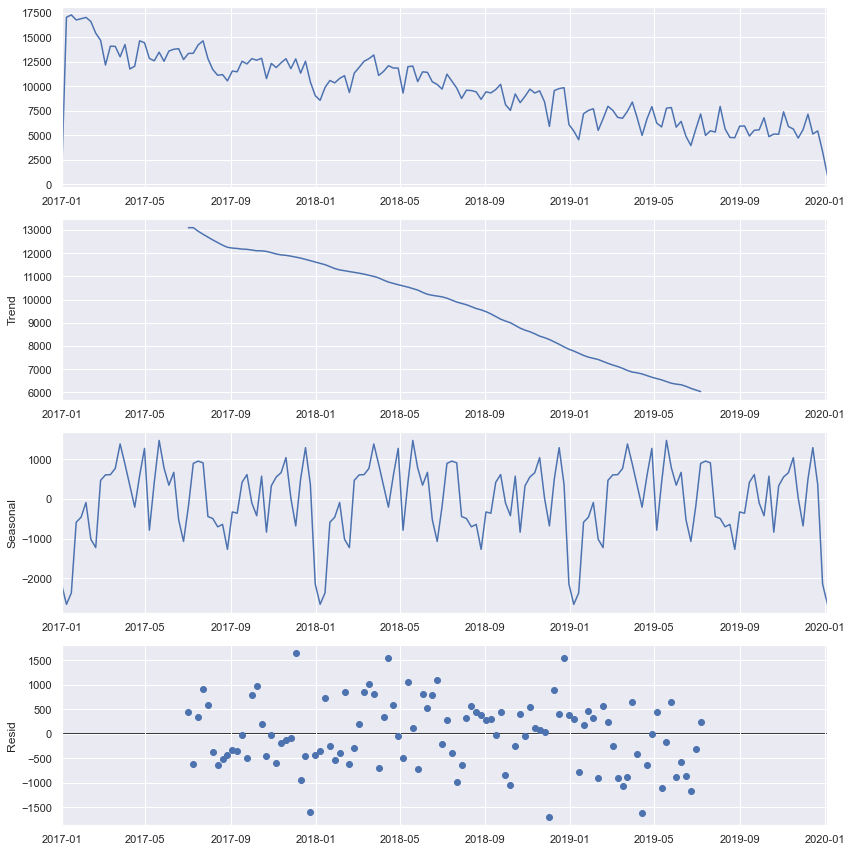

In [37]:
matplotlib.rcParams['figure.figsize'] = [12,12]
descompose_week_pesado.plot()
plt.show()

Nuevamente observamos y afirmamos las tendencias negativas en nuestro flujo vehicular. Esto nos lleva a pensar si luego de Noviembre de 2017 hubo alguna circunstancia en particular que produjo el cambio de tendencia, por ejemplo un cambio en la forma de pago.

## Parte B - Modelo de predicción

#### Autocorrelacion

Lo primero que haremos es una limpieza de outliers y encodeado de nuestros features, para luego ver la correlacion que tienen nuestros datos

In [42]:
df = ds_illia_efectivo

In [43]:
df

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


In [44]:
columns= ['dia','sentido','tipo_vehiculo']
for x in columns: 
    tipos=df[x]
    tipos_coded= pd.get_dummies(tipos, columns=[x])
    df = df.join(tipos_coded)

In [45]:
df.head(2).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   dia             2 non-null      object        
 1   sentido         2 non-null      object        
 2   tipo_vehiculo   2 non-null      object        
 3   cantidad_pasos  2 non-null      int64         
 4   fecha           2 non-null      datetime64[ns]
 5   Domingo         2 non-null      uint8         
 6   Jueves          2 non-null      uint8         
 7   Lunes           2 non-null      uint8         
 8   Martes          2 non-null      uint8         
 9   Miércoles       2 non-null      uint8         
 10  Sábado          2 non-null      uint8         
 11  Viernes         2 non-null      uint8         
 12  Centro          2 non-null      uint8         
 13  Provincia       2 non-null      uint8         
 14  Liviano         2 non-null      uint8         
 15  Pesado    

In [46]:
Q1 = df.cantidad_pasos.quantile(0.25)
Q3 = df.cantidad_pasos.quantile(0.75)
IQR = Q3 - Q1
df=df[~((df.cantidad_pasos < (Q1 - 1.5 * IQR)) |(df.cantidad_pasos > (Q3 + 1.5 * IQR)))]
df.shape

(192654, 16)

In [47]:
print(df.isna().sum())

dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
fecha             0
Domingo           0
Jueves            0
Lunes             0
Martes            0
Miércoles         0
Sábado            0
Viernes           0
Centro            0
Provincia         0
Liviano           0
Pesado            0
dtype: int64


Chequeamos que no existan nulos. En caso de que hayamos tenido, podriamos haber aplicado:

In [48]:
#diario = df.interpolate()

In [49]:
df_diario = df.resample('D', on = 'fecha').sum()
print(df_diario.shape)
df_diario.head()

(1095, 12)


,cantidad_pasos,Domingo,Jueves,Lunes,Martes,Miércoles,Sábado,Viernes,Centro,Provincia,Liviano,Pesado
fecha,,,,,,,,,,,,
2017-01-01,2925,192.0,0.0,0.0,0.0,0.0,0.0,0.0,106.0,86.0,55.0,137.0
2017-01-02,7819,0.0,0.0,273.0,0.0,0.0,0.0,0.0,165.0,108.0,54.0,219.0
2017-01-03,7151,0.0,0.0,0.0,267.0,0.0,0.0,0.0,159.0,108.0,56.0,211.0
2017-01-04,8303,0.0,0.0,0.0,0.0,280.0,0.0,0.0,170.0,110.0,55.0,225.0
2017-01-05,8314,0.0,275.0,0.0,0.0,0.0,0.0,0.0,171.0,104.0,53.0,222.0


Ahora si, vemos la autocorrelacion que tienen nuestros datos(si son de memoria larga o corta, etc) para ver cómo vamos a predecir

In [50]:
from statsmodels.tsa.stattools import acf
nlags =  70
autocorr = acf(df_diario.cantidad_pasos, nlags = nlags)

/Users/armandosergiolopez/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


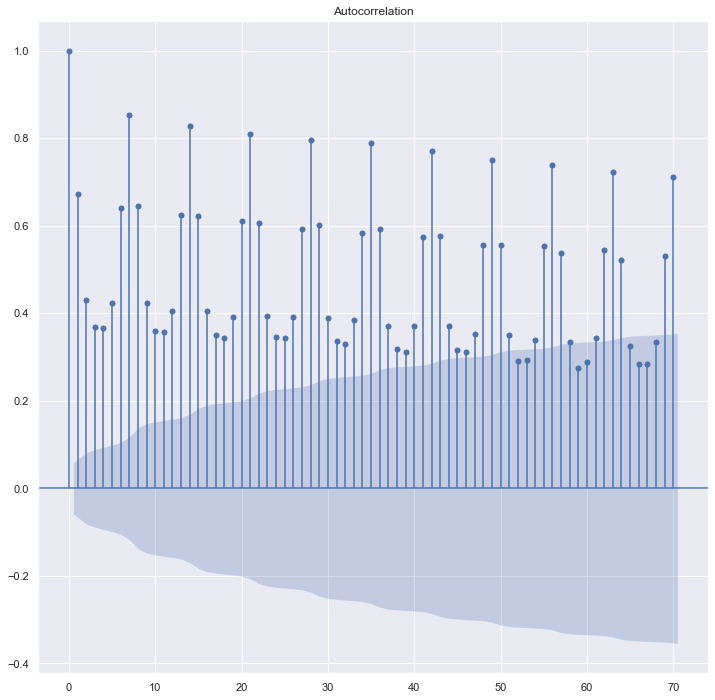

In [51]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_diario.cantidad_pasos, lags = nlags)
plt.show()

In [52]:
import random as rd
rd.seed(7)

#### Predicción - One Step Prediction

In [53]:
one = df_diario.copy()
one = one.cantidad_pasos
one.head()

fecha
2017-01-01    2925
2017-01-02    7819
2017-01-03    7151
2017-01-04    8303
2017-01-05    8314
Freq: D, Name: cantidad_pasos, dtype: int64

In [54]:
one.shape

(1095,)

In [56]:
look_back = 52 
N = one.shape[0]
#Aca defino cuantos valores hacia atras voy a tomar

In [57]:
N = one.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1042, 52) (1042,)


In [58]:
for i in range(X.shape[0]):
    X[i,:] = one.iloc[i:i+look_back]
    y[i] = one.iloc[i+look_back]

#Defino X e y

#### Train Test Split

In [59]:
N_train = 3*52 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 1*52 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(104, 52) (104,)
(52, 52) (52,)


In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [61]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

In [62]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

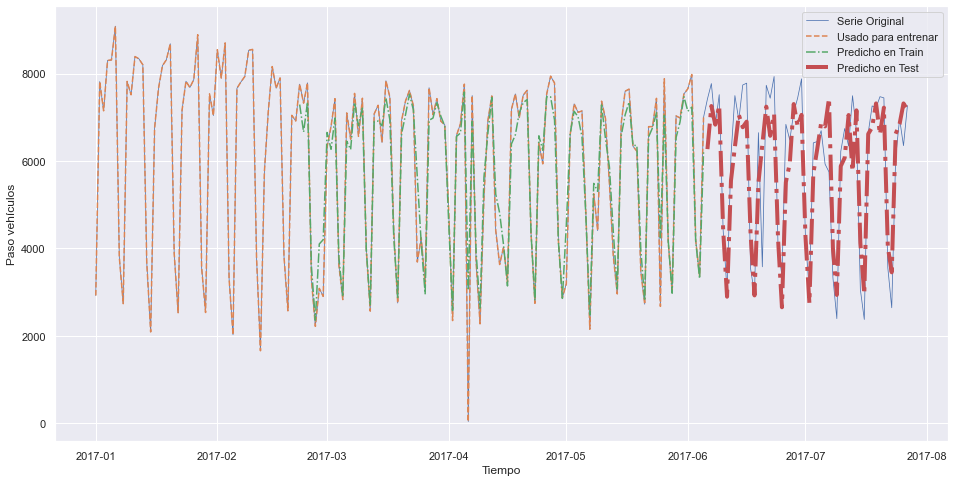

In [63]:
plt.figure(figsize=(16,8))
plt.plot(one.index[:length_total], one[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(one.index[:N_train + look_back], one[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(one.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(one.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Paso vehículos')
plt.show()

A continuación, vamos a evaluar el desempeño de nuestro modelo con RMSE

In [64]:
RMSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(RMSE))

RMSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(RMSE))

Error en Train: 578.3156251422348
Error en Test: 810.6697861182444


La mejor forma de comparar el desempeño de nuestro modelo, es haciendo un modelo Benchmark: Este modelo predice copiando el valor de la fecha anterior. Comparamos los errores de ambos modelos

In [65]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

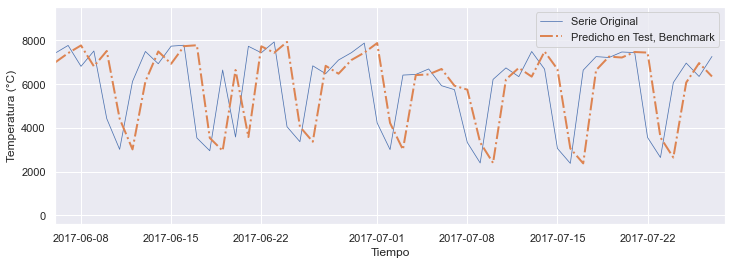

In [66]:
plt.figure(figsize=(12,4))
plt.plot(one.index[:length_total], one[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(one.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(one.index[N_train+look_back], one.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

In [70]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
RMSE = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])
print("Error Modelo Benchmark =", np.sqrt(RMSE))

Error Modelo Benchmark = 2085.589526507295


Como podemos observar, el desempeño de nuestro modelo es mucho mejor que el modelo Benchmark (RMSE Modelo= 810 ; Error Benchmark: 2085)